# Plot curvilinear-grid model output

## Setting up the data

Referenced: 
- https://xgcm.readthedocs.io/en/latest/grid_topology.html
- https://xgcm.readthedocs.io/en/latest/example_mitgcm.html
- https://media.readthedocs.org/pdf/xgcm/latest/xgcm.pdf

### NetCDF4

In [6]:
%pylab inline
import netCDF4
import xarray
from netCDF4 import Dataset

Populating the interactive namespace from numpy and matplotlib


In [8]:
ncf = Dataset('../example_1degree_data/ocean.0001-0010.ssh.nc', "r", format="NetCDF4")
x_data = xarray.open_dataset('../example_1degree_data/ocean.0001-0010.ssh.nc')

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:416: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


In [11]:
ncf_old = Dataset('example_data/WOA13_annual_SST_nc3_classic.nc', "r", format="NetCDF4")

In [13]:
ncf_old

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    Conventions: CF-1.6
    title: World Ocean Atlas 2013 version 2 : sea_surface_temperature Annual 1.00 degree
    summary: Climatological mean temperature for the global ocean from in situ profile data
    references: Locarnini, R. A., A. V. Mishonov, J. I. Antonov, T. P. Boyer, H. E. Garcia, O. K. Baranova, M. M. Zweng, C. R. Paver, J. R. Reagan,D. R. Johnson, M. Hamilton, and D. Seidov , 2013: World Ocean Atlas 2013, Volume 1: Temperature. S. Levitus, Ed., A. Mishonov technical editor, NOAA Atlas NESDIS 73.
    institution: National Oceanographic Data Center(NODC)
    comment: global climatology as part of the World Ocean Atlas project
    id: woa13_decav_t00_01.ncv2.0
    naming_authority: gov.noaa.nodc
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention Standard Name Table v29
    sea_name: World-Wide Distribution
    time_coverage_start: 0000-01-01
   

In [10]:
x_data.variables

/Users/Esther/miniconda2/envs/xarrays/lib/python3.6/site-packages/xarray/conventions.py:435: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


Frozen(OrderedDict([('nv', <xarray.IndexVariable 'nv' (nv: 2)>
array([1., 2.])
Attributes:
    long_name:       vertex number
    units:           none
    cartesian_axis:  N), ('ssh', <xarray.Variable (time: 10, yh: 320, xh: 360)>
[1152000 values with dtype=float64]
Attributes:
    long_name:      Sea Surface Height
    units:          m
    cell_measures:  area: area_t
    cell_methods:   area:mean yh:mean xh:mean time: mean
    time_avg_info:  average_T1,average_T2,average_DT), ('time', <xarray.IndexVariable 'time' (time: 10)>
array([netcdftime._netcdftime.DatetimeJulian(1, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(2, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(3, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(4, 7, 2, 0, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(5, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdftime._netcdftime.DatetimeJulian(6, 7, 2, 12, 0, 0, 7, -1, 1),
       netcdfti

In [14]:
ncf

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    filename: ocean.0001-0010.ssh.nc
    title: SPEAR_c96_o1_Control_1850_E50
    associated_files: area_t: 00010101.ocean_static.nc
    grid_type: regular
    grid_tile: N/A
    external_variables: area_t
    comment: FMS time averaging, version 3.0, precision=double
    dimensions(sizes): time(10), nv(2), yh(320), xh(360)
    variables(dimensions): float64 nv(nv), float32 ssh(time,yh,xh), float64 time(time), float64 time_bnds(time,nv), float64 xh(xh), float64 yh(yh), float64 average_T1(time), float64 average_T2(time), float64 average_DT(time)
    groups: 

Upon inspecting our metadata, we can see our "data variable" is 'tos', which is mapped onto specific coordinates 'lat' and 'lon'. Alternatively, we can call `.variables` to view the variables contained in our data set and their attributes.

In [17]:
xh = ncf.variables['xh']
yh = ncf.variables['yh']
ssh = ncf.variables['ssh']

In [26]:
ncf_old.variables['tos']

<class 'netCDF4._netCDF4.Variable'>
float32 tos(lat, lon)
    standard_name: sea_surface_temperature
    long_name: Objectively analyzed mean fields for sea_surface_temperature at standard depth levels.
    coordinates: time lat lon depth
    cell_methods: area: mean depth: mean time: mean
    grid_mapping: crs
    units: degrees_celsius
    _FillValue: 9.96921e+36
unlimited dimensions: 
current shape = (180, 360)
filling off

In [27]:
ssh

<class 'netCDF4._netCDF4.Variable'>
float32 ssh(time, yh, xh)
    long_name: Sea Surface Height
    units: m
    missing_value: -1e+34
    _FillValue: -1e+34
    cell_measures: area: area_t
    cell_methods: area:mean yh:mean xh:mean time: mean
    time_avg_info: average_T1,average_T2,average_DT
unlimited dimensions: time
current shape = (10, 320, 360)
filling off

In [33]:
ssh[1].shape

(320, 360)

Clearly from netCDF4, this is messed up.

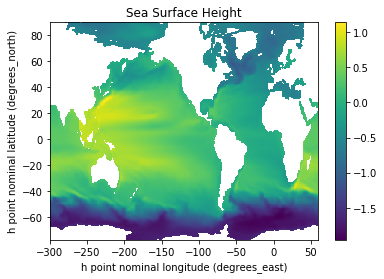

In [35]:
plt.pcolormesh(xh[:], yh[:], ssh[1] ) # picked an arbitrary time for ssh
plt.colorbar();
plt.title(ssh.long_name);
plt.xlabel('%s (%s)' %(xh.long_name, xh.units));
plt.ylabel('%s (%s)' %(yh.long_name, yh.units));

### Creating the grid
Here, we create a `Grid` object from the data, labeling `X` and `Y` as periodic based off the documentation

*Tried to get this working for a while, but for some reason face_connections just isn't a valid input?*

Clearly, looking at the source code, it is part of the initialization: https://github.com/xgcm/xgcm/blob/19b476c2cf6e44c9f6d9331b4bee8f38fd78a21a/xgcm/grid.py

In [8]:
face_connections = {'face': {0: {'X': (None, (1, 'X', False))},
                                 1: {'X': ((0, 'X', False), None)}}}

In [9]:
grid = xgcm.Grid(data)

In [10]:
N = 25
ds = xarray.Dataset({'data_c': (['face', 'y', 'x'], np.random.rand(2, N, N))},
                    coords={'x': (('x',), np.arange(N), {'axis': 'X'}),
                            'xl': (('xl'), np.arange(N)-0.5,
                                   {'axis': 'X', 'c_grid_axis_shift': -0.5}),
                            'y': (('y',), np.arange(N), {'axis': 'Y'}),
                            'yl': (('yl'), np.arange(N)-0.5,
                                   {'axis': 'Y', 'c_grid_axis_shift': -0.5}),
                            'face': (('face',), [0, 1])})

In [11]:
face_connections = {'face': {0: {'X': (None, (1, 'X', False))},
                                 1: {'X': ((0, 'X', False), None)}}}

In [13]:
grid = xgcm.Grid(ds, face_connections=face_connections)

TypeError: __init__() got an unexpected keyword argument 'face_connections'

In [16]:
grid.__attrs__

AttributeError: 'Grid' object has no attribute '__attrs__'

## Plotting the data

We can view the contents of `tos` by simply calling it.

In [8]:
grid._attrs

AttributeError: 'Grid' object has no attribute '_attrs'

Again, we see that each `tos` value corresponds to a `lat`, `lon` coordinate pair. We can plot `tos` using the following plot command. Additionally, we add a color bar to our plot.

TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

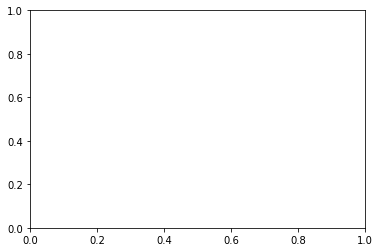

In [4]:
plt.pcolormesh(data['xh'], data['yh'])
plt.colorbar()